# INFO 2950 Project Phase IV
GitHub Repo: https://github.com/gaby-chu/info2950

### Do schools with certain language programs have higher academic performance?

In [25]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.cluster import KMeans

In [26]:
academic_data = pd.read_csv("2014-15_to_2017-19_NYC_Regents_Exam_Results_-_Public.csv")

In [27]:
academic_data = academic_data.rename(columns={"Unnamed Column": "school_test", "School DBN": "DBN", "School Name": "school_name_x",
                                              "School Level": "School Category", "Year": "year", "Regents Exam": "regents", "Mean Score": "mean_score"})

academic_data = academic_data.loc[academic_data.mean_score != 's']
academic_data['mean_score'] = academic_data['mean_score'].astype(float)

## math tests
math_tests = academic_data.loc[(academic_data["regents"] == "Common Core Algebra") |  (academic_data["regents"] == "Common Core Algebra2") | (academic_data["regents"] == "Common Core Geometry") |
                             (academic_data["regents"] == "Integrated Algebra") | (academic_data["regents"] == "Geometry") | (academic_data["regents"] == "Algebra2/Trigonometry")]
math_tests = math_tests.rename(columns = {"mean_score": "math_score"})
mean_math_score = math_tests.groupby("DBN").math_score.mean()

## language tests
fl_tests = academic_data.loc[(academic_data["regents"] == "Spanish") |  (academic_data["regents"] == "French") | (academic_data["regents"] == "Chinese") |
                             (academic_data["regents"] == "Italian")]
fl_tests = fl_tests.rename(columns = {"mean_score": "fl_score"})
mean_fl_score = fl_tests.groupby("DBN").fl_score.mean()

## history tests
history_tests = academic_data.loc[(academic_data["regents"] == "Global History and Geography") |  (academic_data["regents"] == "U.S. History and Government")]
history_tests = history_tests.rename(columns = {"mean_score": "history_score"})
mean_history_score = history_tests.groupby("DBN").history_score.mean()

## science tests
science_tests = academic_data.loc[(academic_data["regents"] == "Living Environment") |  (academic_data["regents"] == "Physical Settings/Chemistry") |
                                  (academic_data["regents"] == "Physical Settings/Earth Science") |  (academic_data["regents"] == "Physical Settings/Physics") ]
science_tests = science_tests.rename(columns = {"mean_score": "science_score"})
mean_science_score = science_tests.groupby("DBN").science_score.mean()

## english tests
english_tests = academic_data.loc[(academic_data["regents"] == "Common Core English") |  (academic_data["regents"] == "English") ]
english_tests = english_tests.rename(columns = {"mean_score": "english_score"})
mean_english_score = english_tests.groupby("DBN").english_score.mean()

# create dataframe of all the mean subject scores
mean_subject_scores = pd.DataFrame([mean_math_score])
mean_subject_scores = mean_subject_scores.append(mean_fl_score).append(mean_history_score).append(mean_science_score).append(mean_english_score)
mean_subject_scores = mean_subject_scores.transpose()

In [28]:
# merge bilingual data and mean subject scores to perform data analysis

academic_performance_data = bilingual_demographic_data.merge(mean_subject_scores, on = "DBN")
academic_performance_data = academic_performance_data.loc[(academic_performance_data['Language'] == 'Spanish') | (academic_performance_data['Language'] == 'Chinese') | (academic_performance_data['Language'] == 'French')]
academic_performance_data.head()

,Borough,Borough/Citywide Office (B/CO),District,DBN,school_name_x,School Category,Program,Language,General/Special Education,school_name_y,...,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,math_score,fl_score,history_score,science_score,english_score
0,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,General Education,P.S. 184m Shuang Wen,...,99,0.140,469,66.3%,67.2,84.520000,NaN,NaN,87.733333,NaN
1,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,Special Education,P.S. 184m Shuang Wen,...,99,0.140,469,66.3%,67.2,84.520000,NaN,NaN,87.733333,NaN
2,Manhattan,Manhattan,1,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Dual Language,Chinese,General Education,School for Global Leaders,...,17,0.083,172,84.3%,84.7,75.460000,NaN,NaN,NaN,NaN
3,Manhattan,Manhattan,2,02M131,M.S. 131,Junior High-Intermediate-Middle,Dual Language,Chinese,General Education,M.S. 131,...,70,0.230,269,88.5%,85.1,86.466667,NaN,NaN,82.025000,NaN
4,Manhattan,Bronx,2,02M542,Manhattan Bridges High School,High school,Dual Language,Spanish,General Education,Manhattan Bridges High School,...,189,0.363,443,85.2%,92.7,67.970000,88.84,72.86,67.020000,73.4


In [29]:
academic_performance_data.to_csv('academic_performance_data.csv', index=False)

In [30]:
spanish_academic_performance = academic_performance_data.loc[academic_performance_data['Language'] == 'Spanish'] 
chinese_academic_performance = academic_performance_data.loc[academic_performance_data['Language'] == 'Chinese'] 
french_academic_performance = academic_performance_data.loc[academic_performance_data['Language'] == 'French']

display(french_academic_performance['english_score'])

spanish_math = spanish_academic_performance['math_score']
chinese_math = chinese_academic_performance['math_score']
french_math = french_academic_performance['math_score']


10          NaN
40          NaN
42          NaN
44          NaN
47    60.528571
Name: english_score, dtype: float64

nan nan


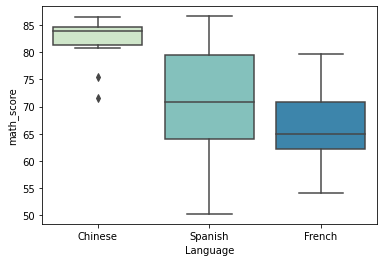

In [37]:
sns.boxplot(x='Language',y='math_score',data=academic_performance_data, palette='GnBu');

F, p = stats.f_oneway(academic_performance_data.loc[academic_performance_data['Language'] == 'Spanish', 'math_score'],
               academic_performance_data.loc[academic_performance_data['Language'] == 'Chinese', 'math_score'],
               academic_performance_data.loc[academic_performance_data['Language'] == 'French', 'math_score'])

print(F,p)

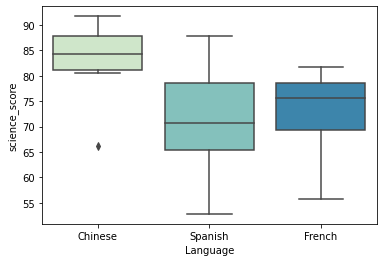

In [32]:
sns.boxplot(x='Language',y='science_score',data=academic_performance_data, palette='GnBu');

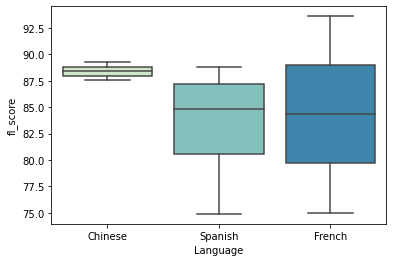

In [33]:
sns.boxplot(x='Language',y='fl_score',data=academic_performance_data, palette='GnBu');

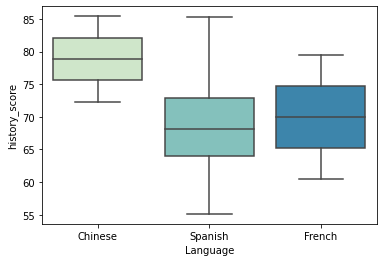

In [34]:
sns.boxplot(x='Language',y='history_score',data=academic_performance_data, palette='GnBu');

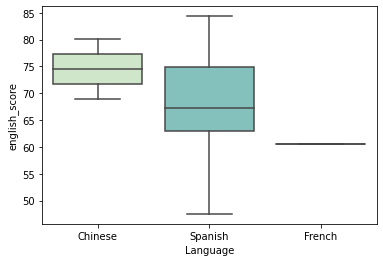

In [35]:
sns.boxplot(x='Language',y='english_score',data=academic_performance_data, palette='GnBu');